In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats


In [3]:
# Load benin-malanville dataset
df = pd.read_csv("../data/sierraleone-bumbuna.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
# Summary for numerical columns
print("The description of numeric columns")
print(df.describe())
# Overview of categorical columns
print("------------------------------")
print("The description of categorical columns")
print(df.describe(include=['object']))
# Overview of all columns
print("------------------------------")
print("The description of all columns")
print(df.describe(include='all'))
# Overview of the dataset
print("------------------------------")
print("Print an overview of the dataset: the last 5 rows")
print(df.tail())
# Overview of the dataset
print("------------------------------")
print("Print an overview of the dataset: a random sample of 5 rows")
print(df.sample(5))
# Overview of the dataset
print("------------------------------")
print("Print an overview of the dataset: the shap of dataset")
print(df.info())
# Check for missing values
print("------------------------------")
print("Check for missing values")
print(df.isna().sum())


The description of numeric columns
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000  

In [6]:
#Outlier Detection (Z-score method)

from scipy.stats import zscore

# Select relevant columns
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers ([Z] > 3)
z_scores = np.abs(stats.zscore(df[columns_to_check]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")


Number of outlier samples flagged: 16292


In [7]:
# Impute missing values using median for key columns
for col in columns_to_check:
    df.loc[outlier_flags, col] = df[col].median()

# Optionally drop extreme outliers
df_clean = df[(np.abs(z_scores) <= 3).all(axis=1)]

# Save cleaned version
df_clean.to_csv("../data/sierraleone_clean.csv", index=False)

/tmp/ipykernel_60295/702673665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])


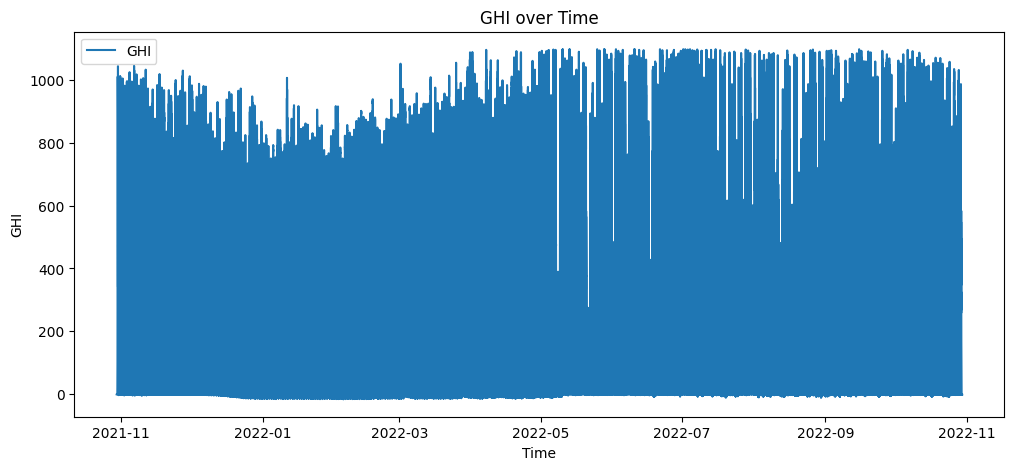

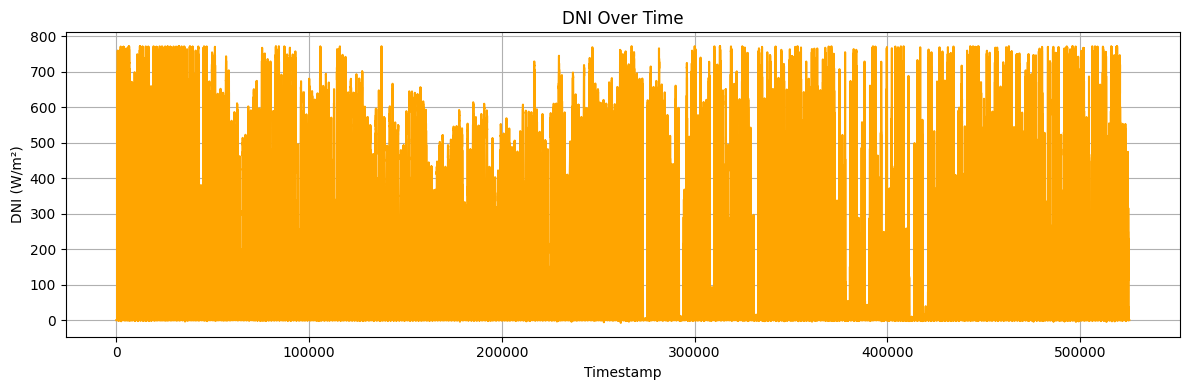

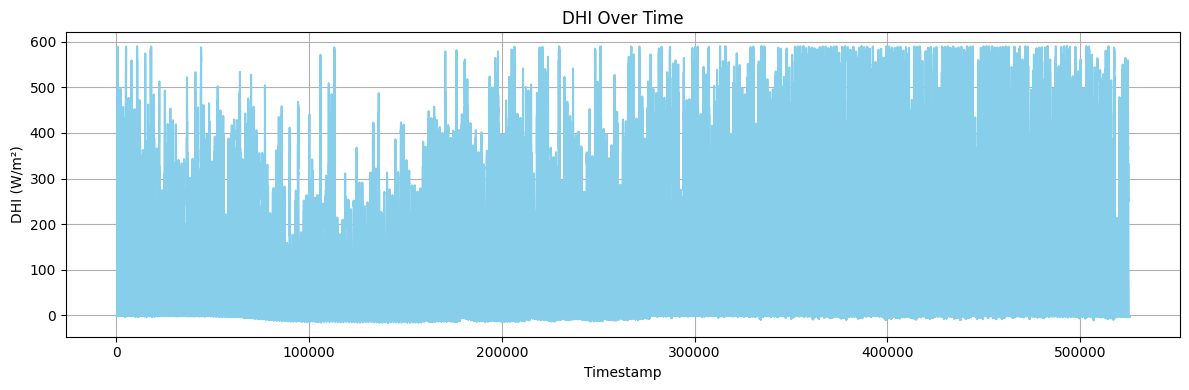

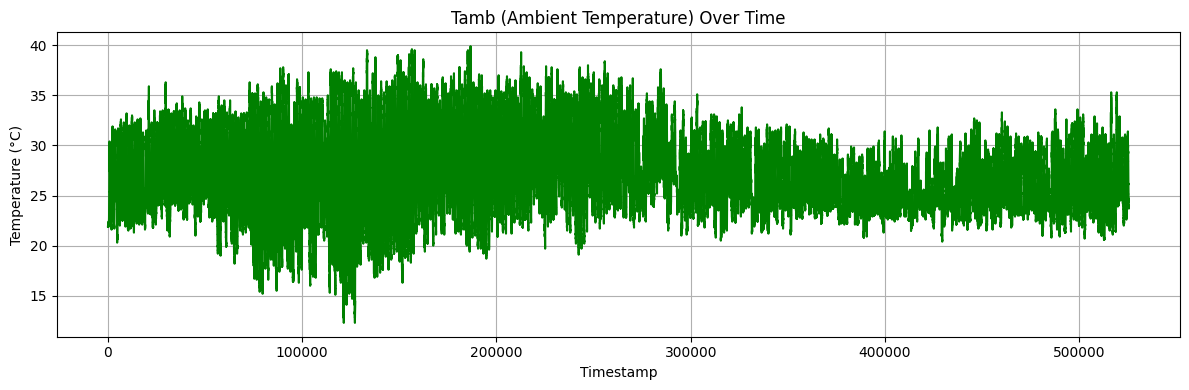

In [9]:
#Time Series Plots

# Convert Timestamp
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Plot GHI over time
plt.figure(figsize=(12, 5))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.title("GHI over Time")
plt.xlabel("Time")
plt.ylabel("GHI")
plt.legend()
plt.show()


# Plot DNI
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x=df.index, y="DNI", color="orange")
plt.title("DNI Over Time")
plt.ylabel("DNI (W/m²)")
plt.xlabel("Timestamp")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot DHI
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x=df.index, y="DHI", color="skyblue")
plt.title("DHI Over Time")
plt.ylabel("DHI (W/m²)")
plt.xlabel("Timestamp")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot DHI
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x=df.index, y="Tamb", color="green")
plt.title("Tamb (Ambient Temperature) Over Time")
plt.ylabel("Temperature (°C)")
plt.xlabel("Timestamp")
plt.grid(True)
plt.tight_layout()
plt.show()

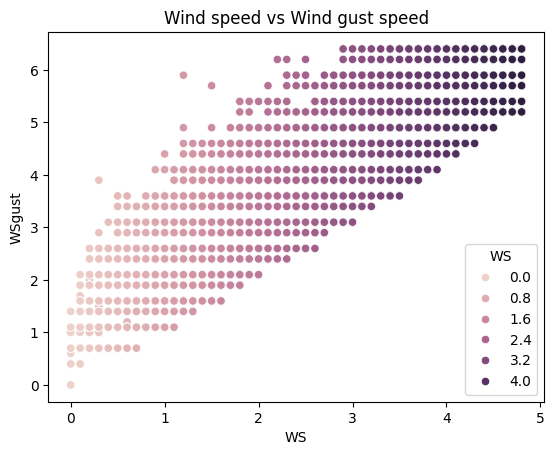

/media/teddy/Local Disk(D)/Tenx  /projects/solar-challenge-week1/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


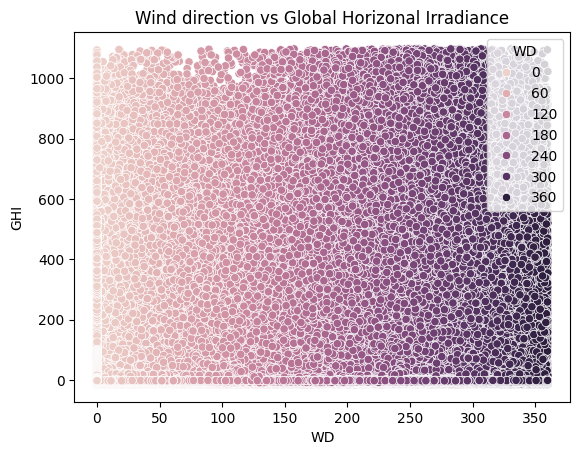

/media/teddy/Local Disk(D)/Tenx  /projects/solar-challenge-week1/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


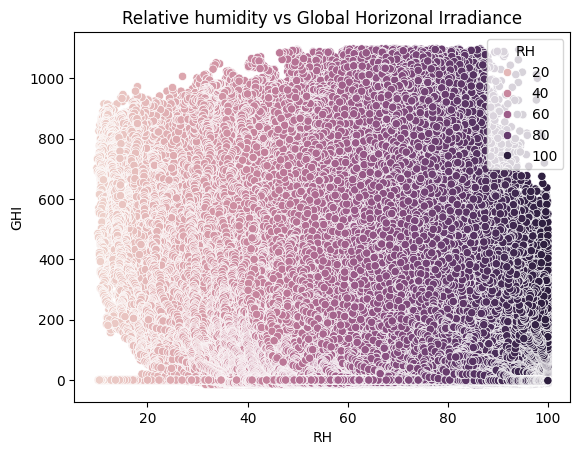

In [9]:
#Scatter and Distribution Plots

sns.scatterplot(data=df, x="WS", y="WSgust", hue="WS")
plt.title("Wind speed vs Wind gust speed")
plt.show()

sns.scatterplot(data=df, x="WD", y="GHI", hue="WD")
plt.title("Wind direction vs Global Horizonal Irradiance")
plt.show()

sns.scatterplot(data=df, x="RH", y="GHI", hue="RH")
plt.title("Relative humidity vs Global Horizonal Irradiance")
plt.show()

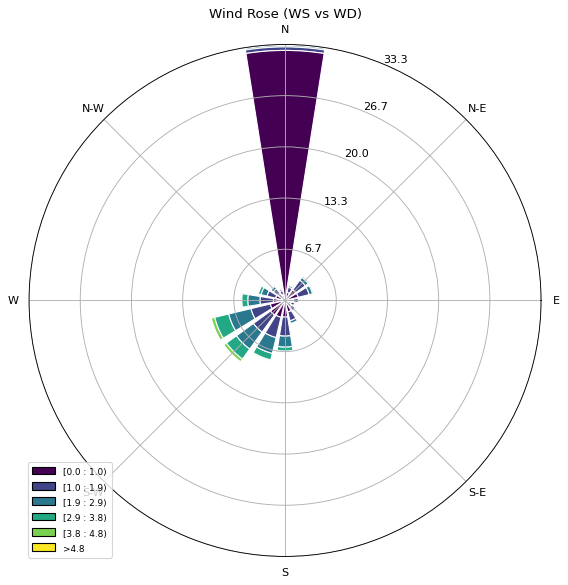

In [10]:
# Wind rose plot

from windrose import WindroseAxes
import matplotlib.pyplot as plt

ws = df['WS'].dropna()
wd = df['WD'].dropna()

# Ensure equal length
min_len = min(len(ws), len(wd))
ws = ws[:min_len]
wd = wd[:min_len]

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose (WS vs WD)")
plt.show()



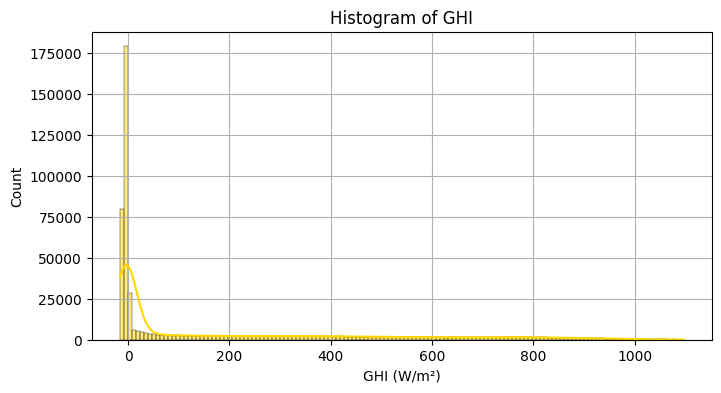

In [11]:
# Histogram of GHI

plt.figure(figsize=(8, 4))
sns.histplot(df['GHI'], kde=True, color='gold')
plt.title("Histogram of GHI")
plt.xlabel("GHI (W/m²)")
plt.grid(True)
plt.show()


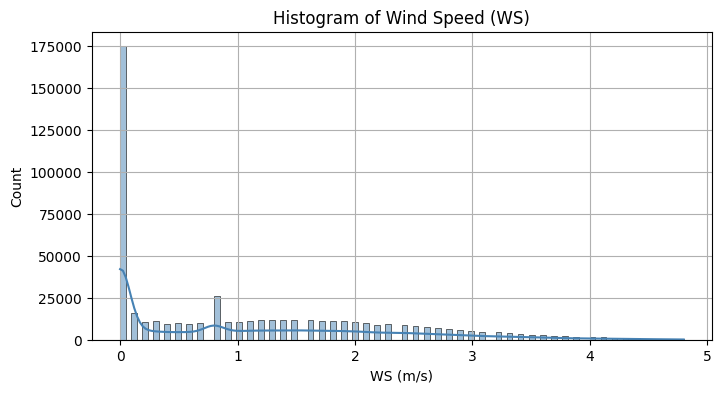

In [12]:
# Histogram of WS

plt.figure(figsize=(8, 4))
sns.histplot(df['WS'], kde=True, color='steelblue')
plt.title("Histogram of Wind Speed (WS)")
plt.xlabel("WS (m/s)")
plt.grid(True)
plt.show()


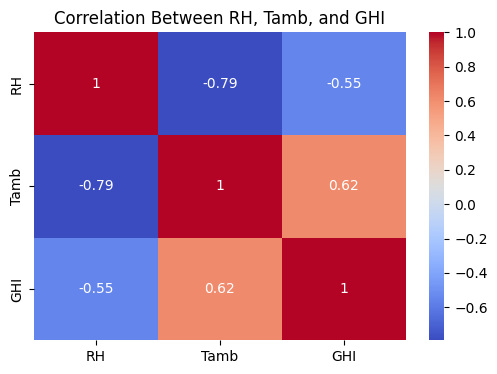

In [13]:
#  Temperature Analysis

plt.figure(figsize=(6, 4))
sns.heatmap(df[['RH', 'Tamb', 'GHI']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between RH, Tamb, and GHI")
plt.show()


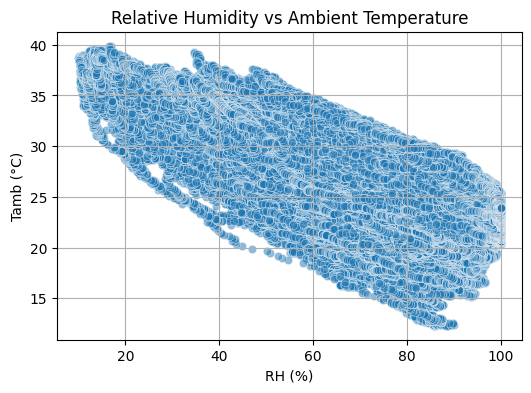

In [14]:
# RH vs Tamb

plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.5)
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("RH (%)")
plt.ylabel("Tamb (°C)")
plt.grid(True)
plt.show()

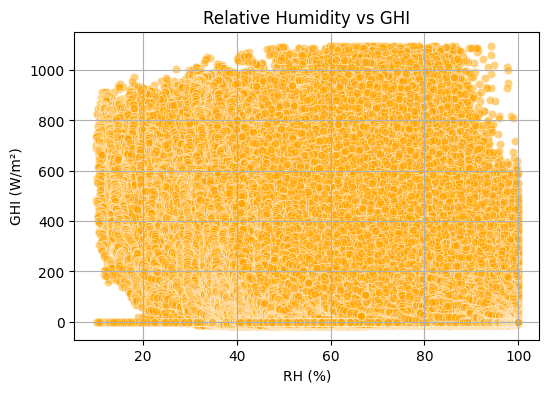

In [15]:
# RH vs GHI

plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.5, color='orange')
plt.title("Relative Humidity vs GHI")
plt.xlabel("RH (%)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.show()


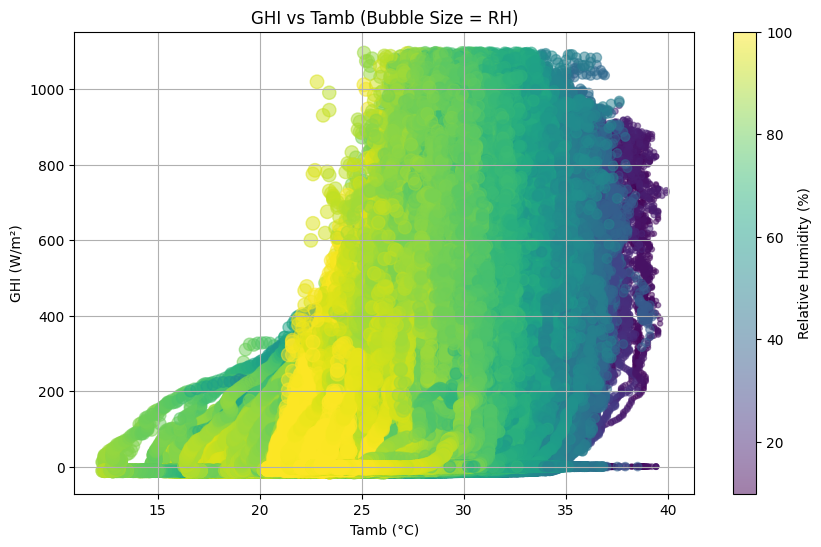

In [16]:
# Bubble Chart: GHI vs Tamb with RH or BP as bubble size

plt.figure(figsize=(10, 6))
plt.scatter(
    df['Tamb'],
    df['GHI'],
    s=df['RH'],  # Bubble size
    alpha=0.5,
    c=df['RH'],
    cmap='viridis'
)
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Tamb (Bubble Size = RH)')
plt.grid(True)
plt.show()
